In [45]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm.auto import tqdm
from pathlib import Path
from readers import OpenEphysReader, BinaryReader, ExcelReader
import scipy.io as sio

In [11]:
## traces compare

# uploading the Excel file with all the recording
rec_table_folder = '/media/sil1/Nitzan/Experiments/brainStatesWake.xlsx'
rec_table = pd.read_excel(rec_table_folder)

xls = ExcelReader(rec_table)
xls

,Exclude,spikes,sortedManually,videoSync,eyeVideo,Breathing,Animal,recNames,Remarks,Date,...,Temp,tempMedian,accelerometerCh,Complete_recording,TempLogger_file,Temp_verifcation,video_start_time,video_end_time,AUX_data,video_triggers
0,NaN,NaN,NaN,NaN,NaN,NaN,SA15,testPC,made a copy to work on my PC,2022-08-09 00:00:00,...,NaN,NaN,"33,34,35",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,PV87,hunterTest,made a copy to work on my PC,2022-10-27 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,SA15,Day1,"short, 1 video",2022-08-09 00:00:00,...,NaN,NaN,"33,34,35",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,SA15,Day2,1 video,2022-08-10 00:00:00,...,NaN,NaN,"33,34,35",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,SA15,Day3,NaN,2202-08-14 00:00:00,...,NaN,NaN,"33,34,35",NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,SA15,Day4,NaN,2022-08-16 00:00:00,...,NaN,NaN,"33,34,36",NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,SA15,Day5,NaN,2022-08-21 00:00:00,...,NaN,NaN,"33,34,37",NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,SA15,Day6,NaN,2022-08-24 00:00:00,...,NaN,NaN,"33,34,38",NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,SA15,Day7,NaN,2022-08-29 00:00:00,...,NaN,NaN,"33,34,39",NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,SA15,Day8,"short OE (few hrs),FD videos",2022-08-31 00:00:00,...,NaN,NaN,"33,34,40",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
# set current rec - SA15, full day 1
rec = xls.get('PV87','Day2')
rec

OpenEphysReader(animal_id='PV87', rec_id='Day2', root_dir=PosixPath('/media/sil1/Pogona Vitticeps/PV87/PV87_Day2/PV87_OE_Day2_2022-10-27_16-44-52/Record Node 101'), channel=18, is_debug=True, window=2.5, overlap=0.5, fs=20000.0, desired_fs=None, recording_fs=20000.0, start_timestamp=None, excel_table=Exclude                                                             NaN
spikes                                                              NaN
sortedManually                                                      NaN
videoSync                                                           NaN
eyeVideo                                                            NaN
Breathing                                                           NaN
Animal                                                             PV87
recNames                                                           Day2
Remarks                                                             NaN
Date                                              

In [16]:
# rec full time:
full_time_s = rec.time_vector[-1] - rec.time_vector[0]
full_time_h = full_time_s / (60*60)
full_time_s

80418.09915000001

In [103]:

# #loading the data and Metadata from Matlab
mat_out_path = '/media/E/Nitzan/Pipline_testing/Test_Data/'

#Metadata:
metadata_mat = sio.loadmat(mat_out_path + 'metadata.mat')
MAT_dur_s = metadata_mat.get('rec_dur_s')
t_starts = metadata_mat.get('t_start_v')

In [131]:
# reading the data using python:
seg_dur_s = 20 #20 seconds of rec for each segment
py_data = {}
# builds a dict for the 3 segments, each val is a tuple of the [0]:volts and the [1] times of the segment
for i in range(0,3):
    py_data[str(i+1)] = rec.read(t_start=t_starts[0,i], t_stop= t_starts[0,i]+ seg_dur_s)


In [96]:
# loading 3 Data segments, from MATLAB output
fs = 20000 # sampling freq
seg_len = 20*fs # 20 sec * the sampling freq
MAT_data = {}
for i in range(1,4):
    MAT_data[str(i)] = sio.loadmat(mat_out_path + f'seg_{i}.mat')['seg_plot']


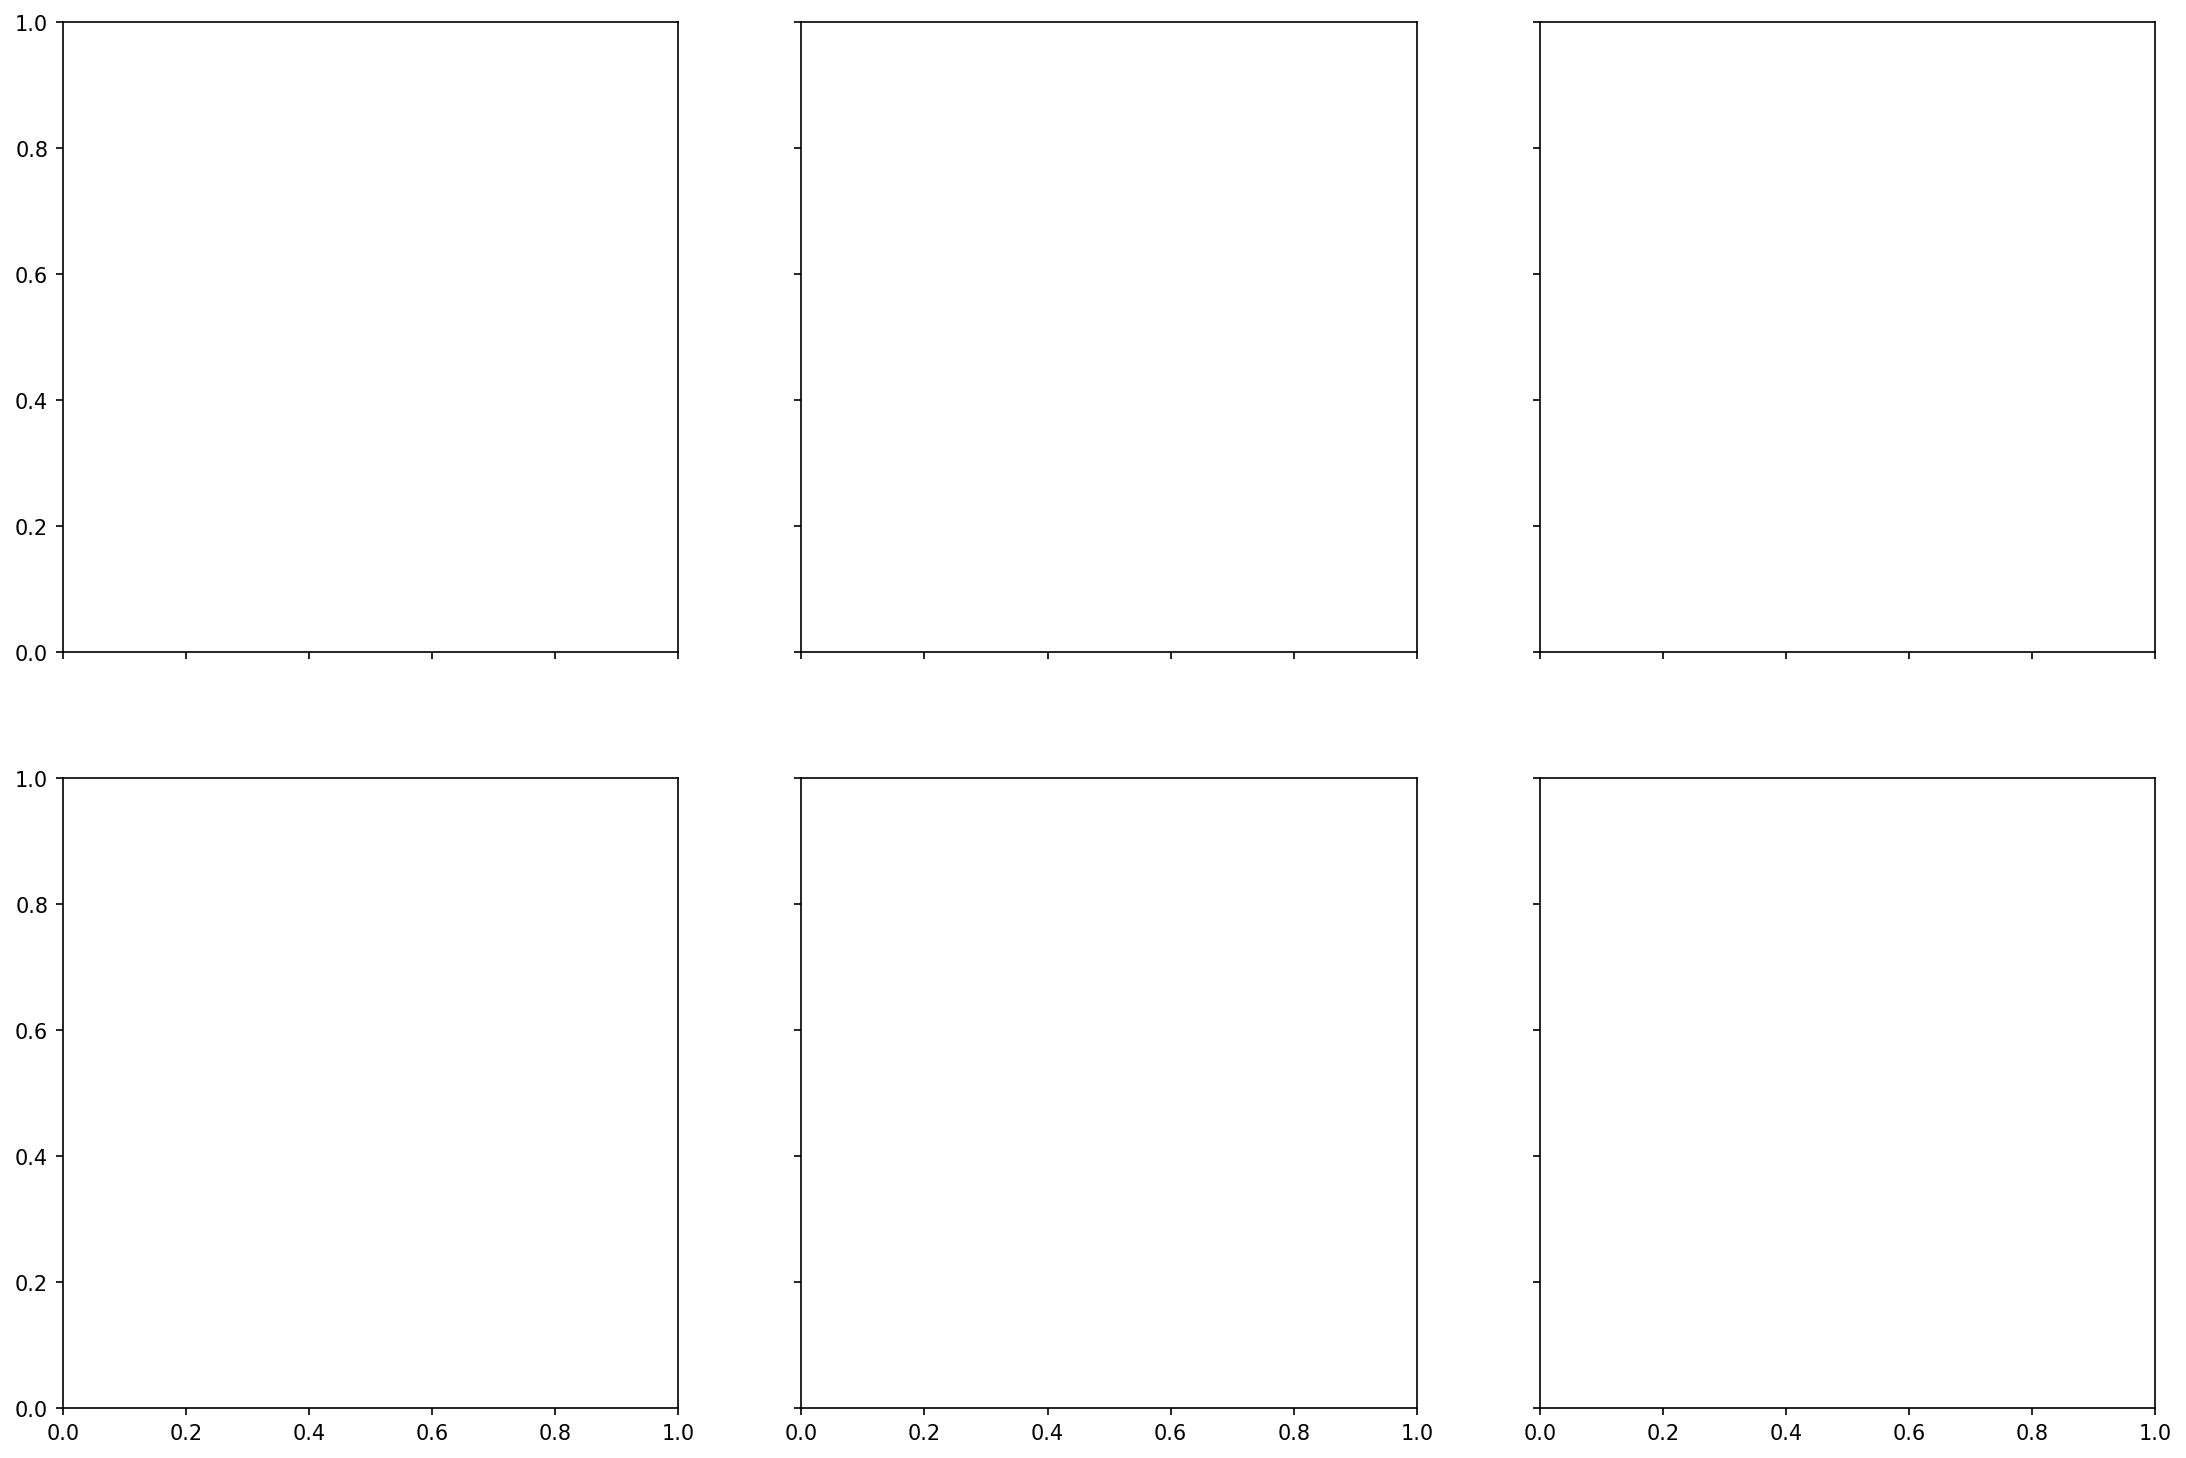

In [145]:
# Plotting the 3 segments. MAT on the top and python on the bottom. segs from left to right.
fig, axs = plt.subplots(nrows = 2, ncols = 3,
             sharex = 'col', sharey='row',
                        figsize = (6*3,6*2), dpi = 150)

for i, ax in enumerate(range(1,4),axs.flatten):

    ax.plot()